## Preproccesing Data (Extracting Data)
### Meteorite Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)

print("Number of observations: " + str(df_meteorite.shape[0]))
df_meteorite.head()

Number of observations: 38116


name     recclass    mass (g)   fall  year    reclat  \
174    Castrovillari   Stone-uncl     15000.0   Fell  1583  39.80000   
26166         Morito  Iron, IIIAB  10100000.0  Found  1600  27.05000   
410        Jalandhar         Iron      1967.0   Fell  1621  31.00000   
956     Stretchleigh   Stone-uncl     10400.0   Fell  1623  50.38333   
369          Hatford   Stone-uncl     29000.0   Fell  1628  51.65000   

         reclong  
174     16.20000  
26166 -105.43333  
410     75.00000  
956     -3.95000  
369     -1.51667

<hr />

### Natural Disaster Data


In [10]:
# Read Natural Disaster data
# ND = Natural Disaster
df_ndisaster = pd.read_csv("natural_disaster.csv")

In [11]:
# Create new dateframe with only necessary columns
df_ndisaster = pd.DataFrame({'Year':df_ndisaster['Incident Begin Date'],
                   'Incident Type':df_ndisaster['Incident Type'], 
                   'Title':df_ndisaster['Title'],
                   'Declared County':df_ndisaster['Declared County/Area']})

df_ndisaster['Year'] = (pd.to_datetime(df_ndisaster['Year'])).dt.year
# drop any row with NAN value
df_ndisaster = df_ndisaster.dropna()

print("Number of observations: " + str(df_ndisaster.shape[0]))

df_ndisaster.head()

Number of observations: 48193


Year Incident Type      Title       Declared County
0  2018          Fire  WILDFIRES        Butte (County)
1  2018          Fire  WILDFIRES  Los Angeles (County)
2  2018          Fire  WILDFIRES      Ventura (County)
3  2018          Fire  WILDFIRES        Butte (County)
4  2018          Fire  WILDFIRES  Los Angeles (County)

### <hr />

## Observing Data

### Observe number of natural disasters occured each year (1959 ~ 2013)

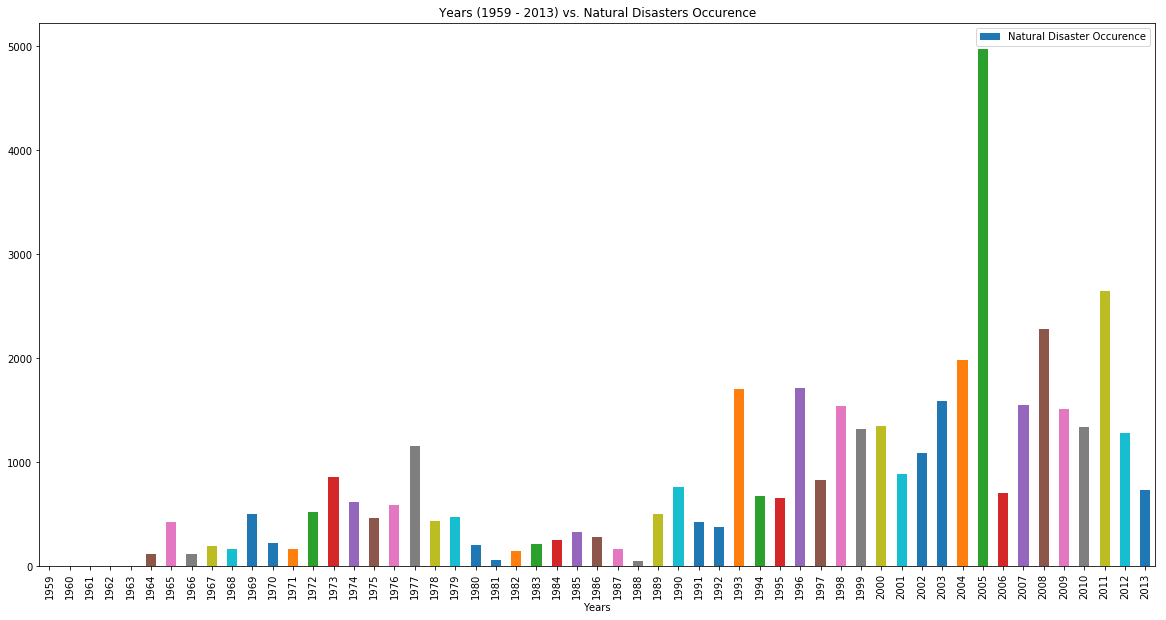

In [12]:
# Sort natural disaster data frame by type of disasters
df_ndisaster = df_ndisaster.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ndisaster['Year'].values

minYear = years[0]
maxYear = 2013
years_freq_nd = [0] * (maxYear - minYear + 1)

for x in years:
    if(x>maxYear):
        break
    years_freq_nd[x-minYear] = years_freq_nd[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

df_years_vs_nd = pd.DataFrame({'Years':years, 'Natural Disaster Occurence':years_freq_nd})
df_years_vs_nd.plot(x='Years', y='Natural Disaster Occurence', kind='bar', figsize=(20,10),
             title="Years (1959 - 2013) vs. Natural Disasters Occurence")

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured each year (1959 ~ 2013)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

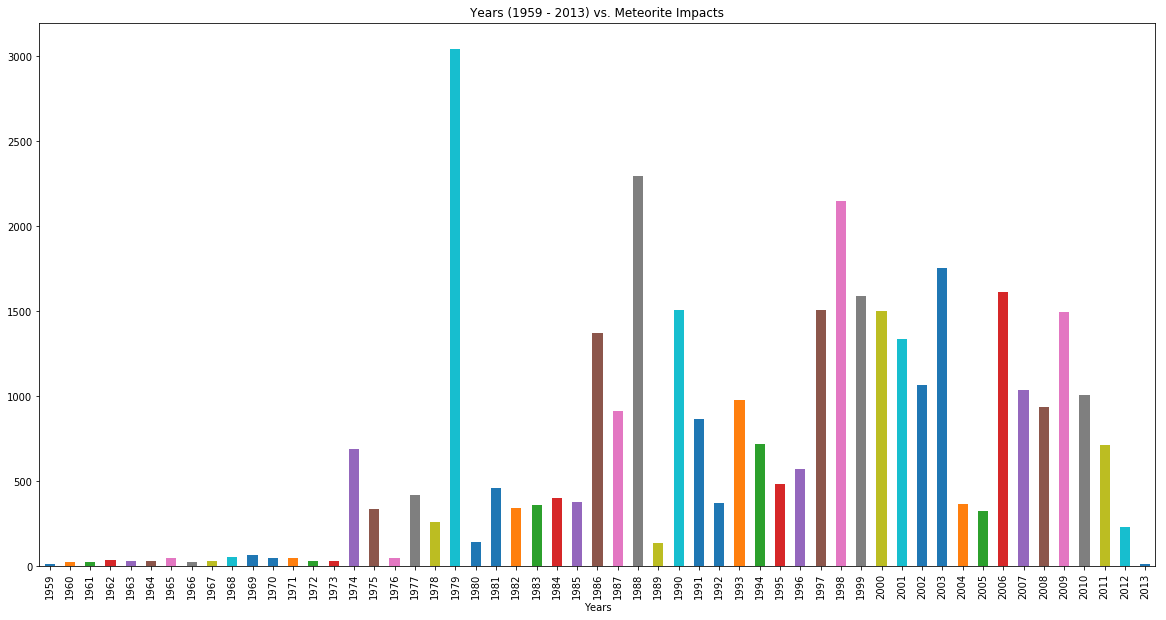

In [13]:
years_freq_meteo = [0] * (maxYear - minYear + 1)

for x in (pd.DataFrame({'Year':df_meteorite['year']})).values:
    if int(x) >= minYear and int(x) <= maxYear:
        years_freq_meteo[int(x)-minYear] = years_freq_meteo[int(x)-minYear] + 1

df_years_vs_meteo = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq_meteo})
df_years_vs_meteo.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2013) vs. Meteorite Impacts", legend=False)

## Plot NDO and MIO side by side

NDO : Natural Disaster Occurence

MIO : Meteroite Impact Occurence

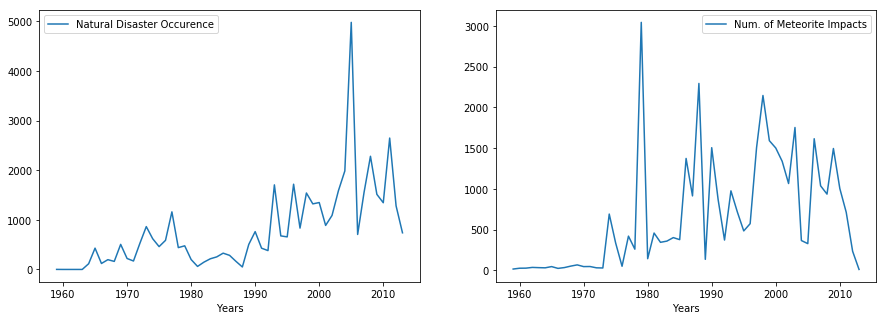

In [14]:
fig, axs = plt.subplots(1,2)

df_years_vs_nd.plot(ax=axs[0], x='Years', y='Natural Disaster Occurence', kind='line', figsize=(15, 5))
df_years_vs_meteo.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 5))

# Geographic Plot

In [15]:
ndo = df_years_vs_nd[(df_years_vs_nd['Years'][:] >= 1959) & (df_years_vs_nd['Years'][:] <= 2013)]
# plt.loglog(df_years_vs_nd['Years'], ndo['Natural Disaster Occurence'], '.')

In [16]:
# type cast string year to int
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

# grab coulmns whose years are btwn 1959 and 2013
df_m = df_meteorite[(df_meteorite['year'][:] >= 1959) & (df_meteorite['year'][:] <= 2013)]

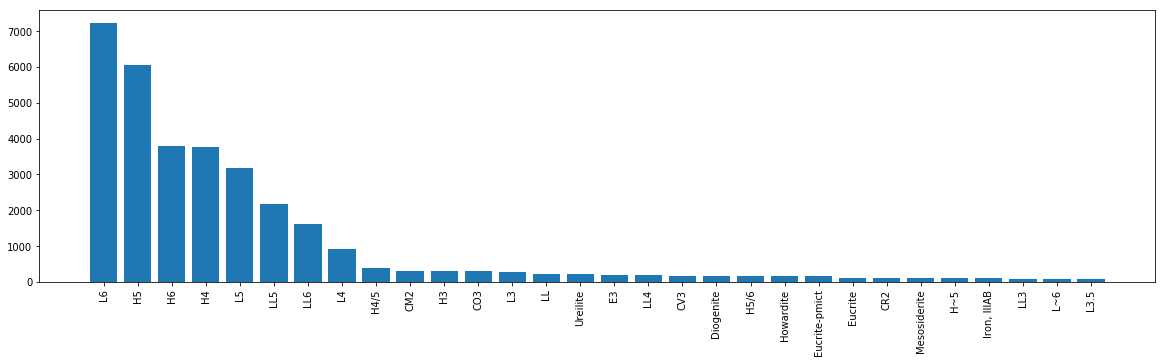

In [17]:
# plot meteorite classification
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

In [220]:
# remove reclong/reclat with value == 0
df_m = df_m[df_m['reclong'] != 0]
df_m = df_m[df_m['reclat'] != 0]

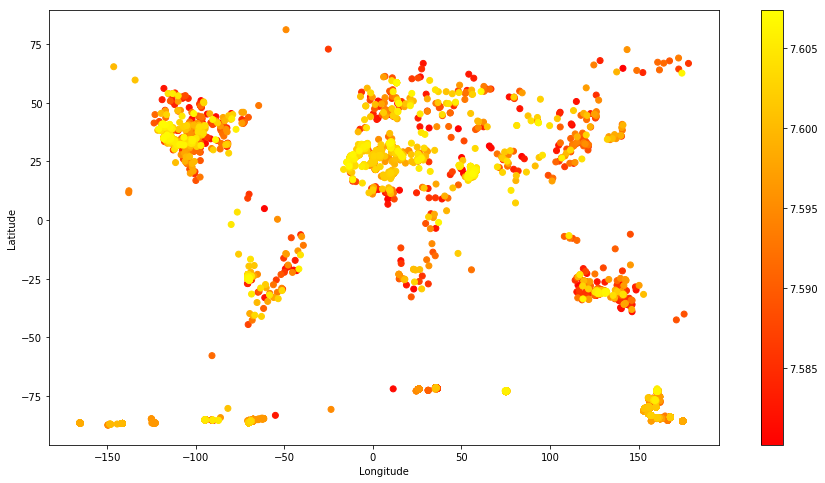

In [221]:
ndo = ndo.rename(columns={'Years': 'year'})

color_yr = [np.log(year) for year in df_m['year']]

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_yr, cmap=plt.cm.autumn)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [222]:
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]

color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

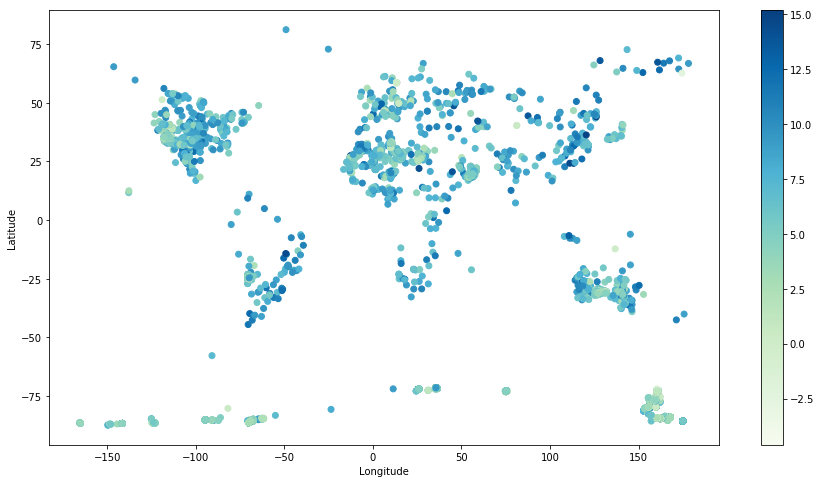

In [223]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## Finalized DataFrame

In [224]:
df_final = pd.DataFrame({
        'years':df_years_vs_nd['Years'],
        'ndo':df_years_vs_nd['Natural Disaster Occurence'],
        'mio':df_years_vs_meteo['Num. of Meteorite Impacts']})

avg_mass = []
max_mass = []
class_name = []
max_count = []

for year in years:
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==year].values))
    max_mass.append(max(df_m['mass (g)'][df_m['year']==year].values))
    max_count.append(df_m.recclass[df_m['year']==year].value_counts()[0])
    class_name.append(df_m.recclass[df_m['year']==year].value_counts().index[0])
    
df_final['class_name'] = pd.DataFrame({'class_name':class_name})
df_final['max_count'] = pd.DataFrame({'max_count':max_count})
df_final['avg_mass'] = pd.DataFrame({'avg_mass':avg_mass})
df_final['max_mass'] = pd.DataFrame({'max_mass':max_mass})

df_final.head()

# years      -> years 1959~2013
# ndo        -> natural disaster occurence
# mio        -> meteorite impact occurence 
# class_name -> classified name of meteorite with most occurence in that year
# max_count  -> above meteorite's max occurence number
# avg_mass   -> average meteorite mass in that year
# max_mass   -> largest meteorite fell in that year

years  ndo  mio class_name  max_count      avg_mass  max_mass
0   1959    1   16         L6          3  28211.393750  200000.0
1   1960    0   26         L6          4  31268.276923  330000.0
2   1961    0   27         H5          7  22980.240741  283000.0
3   1962    0   36         L6          8  15354.877778  100000.0
4   1963    0   33         L6         10  11858.309091  132700.0

## Data Simulation

### Fit a Simple Linear Regression: NDO vs. MIO

const    0.000351
mio      0.094443
dtype: float64


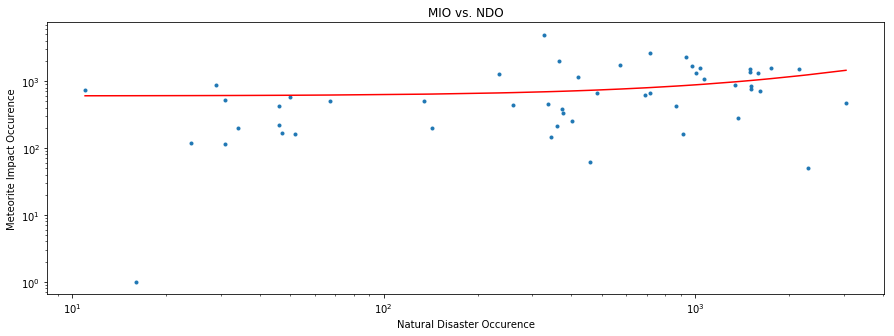

In [225]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

def graph(x, y):
    plt.figure(figsize=(15,5))
    plt.loglog(df_final[x], df_final[y], '.')
    return (df_final[x], df_final[y])
    
# scatter plot ndo vs mio
x, y = graph('mio', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('Meteorite Impact Occurence')
plt.title('MIO vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') #add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Count

const        0.000003
max_count    0.865553
dtype: float64


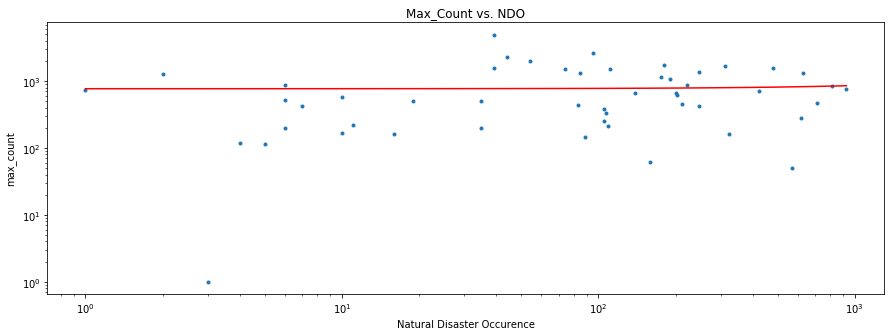

In [226]:
# scatter plot ndo vs max_count
x,y = graph('max_count', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_count')
plt.title('Max_Count vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Avg_Mass

const       9.162708e-09
avg_mass    1.216822e-01
dtype: float64


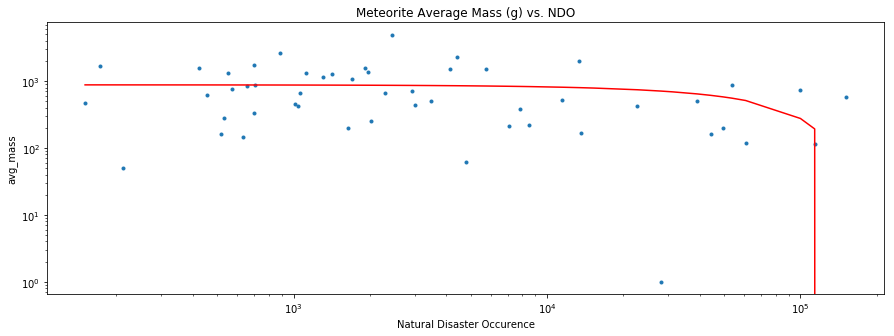

In [227]:
# scatter plot ndo vs avg_mass
x,y = graph('avg_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('avg_mass')
plt.title('Meteorite Average Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Mass

const       6.414412e-07
max_mass    8.066910e-01
dtype: float64


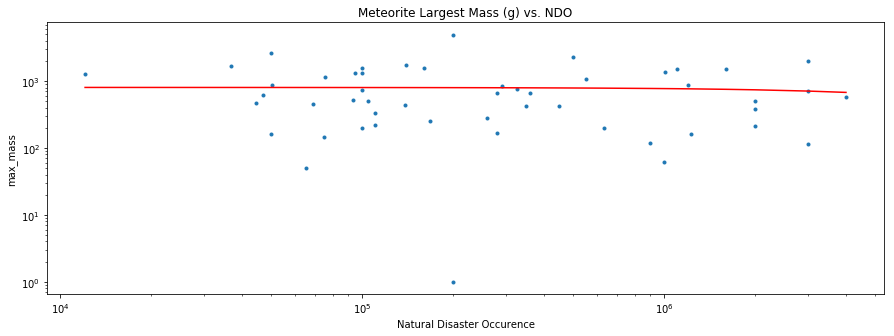

In [228]:
# scatter plot ndo vs max_mass
x,y = graph('max_mass', 'ndo')
plt.xlabel('Natural Disaster Occurence')
plt.ylabel('max_mass')
plt.title('Meteorite Largest Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

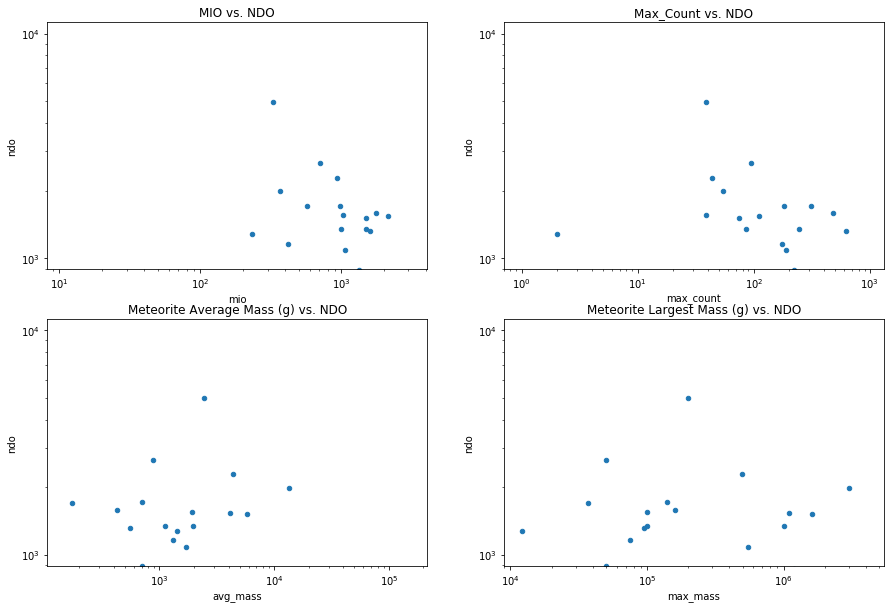

In [229]:
fig, axs = plt.subplots(2,2)

df_final.plot(ax=axs[0][0], x='mio', y='ndo', kind='scatter', title='MIO vs. NDO', figsize=(15,10), loglog=True)
df_final.plot(ax=axs[0][1], x='max_count',y='ndo', kind='scatter', title='Max_Count vs. NDO', loglog=True)
df_final.plot(ax=axs[1][0], x='avg_mass', y='ndo', kind='scatter', title='Meteorite Average Mass (g) vs. NDO', loglog=True)
df_final.plot(ax=axs[1][1], x='max_mass', y='ndo', kind='scatter', title="Meteorite Largest Mass (g) vs. NDO", loglog=True)

## Multiple Regression

In [148]:
# part d
x1 = df[0].values
x2 = df[1].values
_x = []

# combine x1 and x2
for i, j in zip(x1, x2):
    test = [1, i,j]
    _x.append(test)

# multi regression summary
x = _x 
y = df[2]
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

NameError: name 'df' is not defined

In [149]:
df_final

years   ndo   mio class_name  max_count       avg_mass   max_mass
0    1959     1    16         L6          3   28211.393750   200000.0
1    1960     0    26         L6          4   31268.276923   330000.0
2    1961     0    27         H5          7   22980.240741   283000.0
3    1962     0    36         L6          8   15354.877778   100000.0
4    1963     0    33         L6         10   11858.309091   132700.0
5    1964   115    31         H5          5  113838.980645  3000000.0
6    1965   429    46         L6          7   22251.852174   450000.0
7    1966   120    24         L4          4   60791.166667   900000.0
8    1967   197    34         L6          6   49295.114706   630000.0
9    1968   162    52         H5         16   44255.273462  1225300.0
10   1969   505    67         H5         19   39047.394030  2000000.0
11   1970   221    46         L6         11    8525.741304   110700.0
12   1971   170    47         H5         10   13603.131915   279000.0
13   1972   526    31         L5          6   11425.925806    93000.0
14   1973   863    29         H6          6   53605.117241  1200000.0
15   1974   619   691         H5        239     314.929942    47000.0
16   1975   460   336         L6        211    1014.681964    69000.0
17   1976   586    50         L6         10  151278.742000  4000000.0
18   1977  1160   420         H5        176    1308.007190    75500.0
19   1978   440   260         H5         83    3010.647692   138300.0
20   1979   476  3045         H4        709     150.329113    44500.0
21   1980   200   143         L6         35    1637.313007   100000.0
22   1981    61   458         H5        159    4772.673319  1000000.0
23   1982   147   344         L6         89     631.511773    75000.0
24   1983   215   359         L6        109    7058.648802  2000000.0
25   1984   253   402         H5        105    2022.634652   168400.0
26   1985   328   377         H5        107     696.690186   110224.0
27   1986   284  1374         H4        616     532.033028   260000.0
28   1987   163   914         L6        322     519.099387    50000.0
29   1988    50  2295         H5        569     211.675808    65000.0
30   1989   504   135         H5         35    3495.514815   105000.0
31   1990   762  1506         L6        927     572.333938   325000.0
32   1991   428   869         L6        247    1040.851738   350000.0
33   1992   380   372         L6        105    7805.776559  2000000.0
34   1993  1704   976         L5        312     171.592602    36900.0
35   1994   676   717         L5        201    1055.372483   360000.0
36   1995   656   484         L6        139    2297.392624   280000.0
37   1996  1717   573         L6        181     700.832705   140000.0
38   1997   833  1505        LL5        812     651.756844   290000.0
39   1998  1540  2147         H4        485     960.402189  1100000.0
40   1999  1321  1592        LL5        626     547.117153    95000.0
41   2000  1348  1502         H6        248    1965.472752  1003000.0
42   2001   887  1339         H5        223     701.111613    50200.0
43   2002  1088  1066         H5        197    1691.566698   550000.0
44   2003  1587  1754         L6        487     425.163432   160000.0
45   2004  1985   366         H5         67    9885.014590  3000000.0
46   2005  4978   328         H5         43    2533.770366   200000.0
47   2006   705  1616         L6        484    2482.544066  3000000.0
48   2007  1553  1038         H6        187     604.742160   100000.0
49   2008  2280   936        LL6        266    1509.977049   499500.0
50   2009  1513  1496         L6        351    1523.091791  1600000.0
51   2010  1344  1005         L6        185     633.563940   100000.0
52   2011  2647   713         L6        114    1070.849593   115777.0
53   2012  1281   234         L6         22     992.383248    18000.0
54   2013   738    11        LL5          2    9471.636364   100000.0